# Part 1: Cohort characterization

In this document, we will focus on characterization of the clinical parameters of the cohorts obtained from routine blood tests. We will also visualize the metadata of the participants, such as disease state, age, sex, etc.

## Reading and prep of data

In [1]:
source("diabetes_analysis_v07.R")

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQuantiles, rowRanges


Attaching package: ‘patchwork’


The following object is masked from ‘package:XML’:

    free


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘fs’


The following object is masked from ‘package:BiocGenerics’:

    path


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Attaching shinyBS

rgeos version: 0.6-4, (SVN revision 699)
 GEOS runtime version: 3.12.1-CAPI-1.18.1 
 Please note that rgeos will be retired during October 2023,
plan transition to sf or terra functions using GEOS at your earliest convenience.
See https://r-spatial.org/r/2023/05/15/evolution4.html for details.
 GEOS using OverlayNG
 Linking to sp version: 2.1-2 
 Polygon checking: TRUE 


ggtree v3.12.0 For help: https://yulab-smu.top/treedata-book/

If you use the ggtree package suite in published research, pleas

Let's read the file with clinical metadata. 

In [22]:
md  <- read_xlsx("../data/metadata_v07.xlsx")

In [3]:
md  %>% colnames

[1] "patient"                     "time_taken"                 
 [3] "age_taken"                   "Patient_Time"               
 [5] "age_group"                   "sex"                        
 [7] "hba1c_man"                   "ph_man"                     
 [9] "ahco3_man"                   "random_cpeptide_man"        
[11] "bh_man"                      "bh_man_sds"                 
[13] "bw_man"                      "bw_man_sds"                 
[15] "bmi_man"                     "bmi_man_sds"                
[17] "gad_man"                     "iaa_man"                    
[19] "ia2_man"                     "znt8_man"                   
[21] "fasting_cpept_1"             "wbc"                        
[23] "lymph_abs"                   "mon_abs"                    
[25] "neutr_abs"                   "eoz_abs"                    
[27] "baz_abs"                     "lymph_perc"                 
[29] "mon_perc"                    "neutr_perc"                 
[31] "eoz_perc"                    "baz_perc"                   
[33] "tdd_1"                       "tdd_per_kg_1"               
[35] "fasting_cpept_T1"            "idaa1c"                     
[37] "part_remission_y_n"          "c_peptide_change"           
[39] "c_peptide_change_perc"       "HLA_A1"                     
[41] "HLA_A2"                      "HLA_B1"                     
[43] "HLA_B2"                      "HLA_C1"                     
[45] "HLA_C2"                      "HLA_DMA1"                   
[47] "HLA_DMA2"                    "HLA_DMB1"                   
[49] "HLA_DMB2"                    "HLA_DOA1"                   
[51] "HLA_DOA2"                    "HLA_DPA11"                  
[53] "HLA_DPA12"                   "HLA_DPB11"                  
[55] "HLA_DPB12"                   "HLA_DQA11"                  
[57] "HLA_DQA12"                   "HLA_DQB11"                  
[59] "HLA_DQB12"                   "HLA_DRA1"                   
[61] "HLA_DRA2"                    "HLA_DRB11"                  
[63] "HLA_DRB12"                   "HLA_E1"                     
[65] "HLA_E2"                      "HLA_F1"                     
[67] "HLA_F2"                      "sample"                     
[69] "pct_CD8_of_live"             "pct_naive_of_CD8"           
[71] "pct_eff_of_CD8"              "pct_CD4_of_live"            
[73] "pct_naive_of_CD4"            "pct_eff_of_CD4"             
[75] "sort_ratio_naive_to_eff_CD8" "sort_ratio_naive_to_eff_CD4"

We will group the patients based on age, sex and disease status, which will allow visualization of other metadata in these groups later on.

In [4]:
options(repr.plot.width = 20)
md  <- md %>% 
mutate(yy = 1)  %>% 
mutate(name = paste(substr(patient,1,1), age_group, sex, Patient_Time))  

In [5]:
order(levels(factor(md$name)))

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50
[51] 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73

In [6]:
dir.create("../figures/cohort_characterization/basic_metadata/", recursive = T)

Warning message in dir.create("../figures/cohort_characterization/basic_metadata/", :
“'../figures/cohort_characterization/basic_metadata' already exists”


## Cohort characterization - descriptive statistics

In  this section, we will create a summary statistics of participants of the study. 

In [23]:
md  %>% colnames

[1] "patient"                     "time_taken"                 
 [3] "age_taken"                   "Patient_Time"               
 [5] "age_group"                   "sex"                        
 [7] "hba1c_man"                   "ph_man"                     
 [9] "ahco3_man"                   "random_cpeptide_man"        
[11] "bh_man"                      "bh_man_sds"                 
[13] "bw_man"                      "bw_man_sds"                 
[15] "bmi_man"                     "bmi_man_sds"                
[17] "gad_man"                     "iaa_man"                    
[19] "ia2_man"                     "znt8_man"                   
[21] "fasting_cpept_1"             "wbc"                        
[23] "lymph_abs"                   "mon_abs"                    
[25] "neutr_abs"                   "eoz_abs"                    
[27] "baz_abs"                     "lymph_perc"                 
[29] "mon_perc"                    "neutr_perc"                 
[31] "eoz_perc"                    "baz_perc"                   
[33] "tdd_1"                       "tdd_per_kg_1"               
[35] "fasting_cpept_T1"            "idaa1c"                     
[37] "part_remission_y_n"          "c_peptide_change"           
[39] "c_peptide_change_perc"       "HLA_A1"                     
[41] "HLA_A2"                      "HLA_B1"                     
[43] "HLA_B2"                      "HLA_C1"                     
[45] "HLA_C2"                      "HLA_DMA1"                   
[47] "HLA_DMA2"                    "HLA_DMB1"                   
[49] "HLA_DMB2"                    "HLA_DOA1"                   
[51] "HLA_DOA2"                    "HLA_DPA11"                  
[53] "HLA_DPA12"                   "HLA_DPB11"                  
[55] "HLA_DPB12"                   "HLA_DQA11"                  
[57] "HLA_DQA12"                   "HLA_DQB11"                  
[59] "HLA_DQB12"                   "HLA_DRA1"                   
[61] "HLA_DRA2"                    "HLA_DRB11"                  
[63] "HLA_DRB12"                   "HLA_E1"                     
[65] "HLA_E2"                      "HLA_F1"                     
[67] "HLA_F2"                      "sample"                     
[69] "pct_CD8_of_live"             "pct_naive_of_CD8"           
[71] "pct_eff_of_CD8"              "pct_CD4_of_live"            
[73] "pct_naive_of_CD4"            "pct_eff_of_CD4"             
[75] "sort_ratio_naive_to_eff_CD8" "sort_ratio_naive_to_eff_CD4"

The groups can be identified from the donor IDs - those starting with 1 are T1D donors, those starting with 2 are Healthy donors. 

In [24]:
md  <- md  %>% mutate(group = ifelse(substr(patient,1,1)==1,"T1D","Healthy"))

In [25]:
md  %>% group_by(substr(patient,1,1), time_taken)  %>% 
summarise(mean_age = mean(age_taken, na.rm = TRUE),
          sd_age = sd(age_taken, na.rm = TRUE))

`summarise()` has grouped output by 'substr(patient, 1, 1)'. You can override
using the `.groups` argument.


"substr(patient, 1, 1)",time_taken,mean_age,sd_age
<chr>,<chr>,<dbl>,<dbl>
1,T0,9.640885,5.041609
1,T1,10.865805,4.940750
2,T0,9.590154,5.823875


For easy exploratory analysis, we will use the [dlookr package](https://choonghyunryu.github.io/dlookr/articles/EDA.html). 

In [26]:
library(dlookr)

In [27]:
md  %>% group_by(group, time_taken)  %>% 
describe() 

described_variables,group,time_taken,n,na,mean,sd,se_mean,IQR,skewness,⋯,p40,p50,p60,p70,p75,p80,p90,p95,p99,p100
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age_group,Healthy,T0,13,0,1.846153846,0.800640769,2.220578e-01,1.000000,0.306572629,⋯,1.800000,2.00000,2.00000,2.00000,2.00000,2.60000,3.00000,3.00000,3.00000,3.00000
age_group,T1D,T0,30,0,2.000000000,0.830454799,1.516196e-01,2.000000,0.000000000,⋯,2.000000,2.00000,2.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000
age_group,T1D,T1,0,30,NaN,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
age_taken,Healthy,T0,13,0,9.590153688,5.823874569,1.615252e+00,9.059548,-0.027479914,⋯,8.449600,10.61739,12.34825,12.60342,12.88433,14.88186,16.92539,17.40780,17.77314,17.86448
age_taken,T1D,T0,30,0,9.640885238,5.041609274,9.204677e-01,8.856263,0.062673983,⋯,7.804517,9.29911,10.93826,13.70267,14.25599,15.84175,16.28063,16.51061,17.19877,17.46475
age_taken,T1D,T1,29,1,10.865805188,4.940750283,9.174743e-01,8.563997,0.005734127,⋯,9.099521,10.38467,11.97207,14.80747,15.26899,16.80876,17.24463,17.51020,18.22620,18.49144
ahco3_man,Healthy,T0,0,13,NaN,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
ahco3_man,T1D,T0,30,0,14.976666667,7.767469003,1.418139e+00,12.150000,-0.423587951,⋯,13.040000,15.55000,20.04000,21.46000,21.97500,22.62000,23.32000,23.88500,24.41300,24.50000
ahco3_man,T1D,T1,0,30,NaN,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [28]:
colnames(md)

[1] "patient"                     "time_taken"                 
 [3] "age_taken"                   "Patient_Time"               
 [5] "age_group"                   "sex"                        
 [7] "hba1c_man"                   "ph_man"                     
 [9] "ahco3_man"                   "random_cpeptide_man"        
[11] "bh_man"                      "bh_man_sds"                 
[13] "bw_man"                      "bw_man_sds"                 
[15] "bmi_man"                     "bmi_man_sds"                
[17] "gad_man"                     "iaa_man"                    
[19] "ia2_man"                     "znt8_man"                   
[21] "fasting_cpept_1"             "wbc"                        
[23] "lymph_abs"                   "mon_abs"                    
[25] "neutr_abs"                   "eoz_abs"                    
[27] "baz_abs"                     "lymph_perc"                 
[29] "mon_perc"                    "neutr_perc"                 
[31] "eoz_perc"                    "baz_perc"                   
[33] "tdd_1"                       "tdd_per_kg_1"               
[35] "fasting_cpept_T1"            "idaa1c"                     
[37] "part_remission_y_n"          "c_peptide_change"           
[39] "c_peptide_change_perc"       "HLA_A1"                     
[41] "HLA_A2"                      "HLA_B1"                     
[43] "HLA_B2"                      "HLA_C1"                     
[45] "HLA_C2"                      "HLA_DMA1"                   
[47] "HLA_DMA2"                    "HLA_DMB1"                   
[49] "HLA_DMB2"                    "HLA_DOA1"                   
[51] "HLA_DOA2"                    "HLA_DPA11"                  
[53] "HLA_DPA12"                   "HLA_DPB11"                  
[55] "HLA_DPB12"                   "HLA_DQA11"                  
[57] "HLA_DQA12"                   "HLA_DQB11"                  
[59] "HLA_DQB12"                   "HLA_DRA1"                   
[61] "HLA_DRA2"                    "HLA_DRB11"                  
[63] "HLA_DRB12"                   "HLA_E1"                     
[65] "HLA_E2"                      "HLA_F1"                     
[67] "HLA_F2"                      "sample"                     
[69] "pct_CD8_of_live"             "pct_naive_of_CD8"           
[71] "pct_eff_of_CD8"              "pct_CD4_of_live"            
[73] "pct_naive_of_CD4"            "pct_eff_of_CD4"             
[75] "sort_ratio_naive_to_eff_CD8" "sort_ratio_naive_to_eff_CD4"
[77] "group"

Let's describe continuous variables:

In [29]:
table_numeric  <- md  %>% group_by(group, time_taken)  %>% 
describe()  %>% 
dplyr::filter(described_variables %in% c("age_taken", "bmi_man", "hba1c_man", 
                                         "fasting_cpept_1", "gad_man", "iaa_man", "ia2_man", "znt8_man"))  %>% 
dplyr::select(1:7)
table_numeric

described_variables,group,time_taken,n,na,mean,sd
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
age_taken,Healthy,T0,13,0,9.590154,5.823875
age_taken,T1D,T0,30,0,9.640885,5.041609
age_taken,T1D,T1,29,1,10.865805,4.940750
bmi_man,Healthy,T0,11,2,18.709091,3.038899
bmi_man,T1D,T0,30,0,17.313333,4.182536
bmi_man,T1D,T1,29,1,19.741379,3.925786
fasting_cpept_1,Healthy,T0,11,2,642.909091,296.158871
fasting_cpept_1,T1D,T0,30,0,176.593333,181.543761
fasting_cpept_1,T1D,T1,28,2,221.889286,227.879610


In [30]:
dir.create("../tables/cohort_characterization/")

Warning message in dir.create("../tables/cohort_characterization/"):
“'../tables/cohort_characterization' already exists”


In [32]:
write.csv(table_numeric, "../tables/cohort_characterization/table_numeric.csv")

Testing differences between healthy and T1D:

In [39]:
 md  %>% 
dplyr::select(group, time_taken, age_taken, bmi_man, hba1c_man, fasting_cpept_1)  %>% 
dplyr::filter(time_taken == "T0")  %>% 
pivot_longer(cols = c(3:6), names_to = "variable", values_to = "value")  %>% 
group_by(variable)  %>% 
rstatix::wilcox_test(value ~ group)

,variable,.y.,group1,group2,n1,n2,statistic,p
,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
1,age_taken,value,Healthy,T1D,13,30,195.0,1.00e+00
2,bmi_man,value,Healthy,T1D,11,30,217.5,1.26e-01
3,fasting_cpept_1,value,Healthy,T1D,11,30,305.0,5.09e-06
4,hba1c_man,value,Healthy,T1D,11,29,0.0,1.45e-06


For categorical variables we will summarize sex and HLA haplotypes. We will use the columns of metadata representing HLA allele typing from raw fastq reads to assemble the HLA-DQ2 HLA-DQ8 genotypes.

In [16]:
table_category  <- md  %>% group_by(group, time_taken)  %>% 
 mutate(dq2 = ifelse((HLA_DQA11 == "DQA1*05:01:01" | HLA_DQA12 == "DQA1*05:01:01") &
                                   (HLA_DQB11 == "DQB1*02:01:01" | HLA_DQB12 == "DQB1*02:01:01"),"DQ2",
                                   "Other"),
                      dq8 = ifelse((HLA_DQA11 == "DQA1*03:01:01" | HLA_DQA12 == "DQA1*03:01:01") &
                                   (HLA_DQB11 == "DQB1*03:02:01" | HLA_DQB12 == "DQB1*03:02:01"),"DQ8",
                                   "Other"))  %>% 
mutate(dq2_8 = ifelse(dq2 == "DQ2" & dq8 == "DQ8","DQ2_8",
                                     ifelse(dq2 == "DQ2","DQ2", ifelse(dq8 == "DQ8","DQ8","Other"))))  %>% 
diagnose_category(sex, dq2, dq8, dq2_8) 

table_category

variables,group,time_taken,levels,N,freq,ratio,rank
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<int>
sex,Healthy,T0,f,13,9,69.230769,1
sex,Healthy,T0,m,13,4,30.769231,2
sex,T1D,T0,m,30,20,66.666667,1
sex,T1D,T0,f,30,10,33.333333,2
sex,T1D,T1,NA,30,30,100.000000,1
dq2,Healthy,T0,Other,13,12,92.307692,1
dq2,Healthy,T0,DQ2,13,1,7.692308,2
dq2,T1D,T0,DQ2,30,16,53.333333,1
dq2,T1D,T0,Other,30,14,46.666667,2


In [20]:
write.csv(table_category, "../tables/cohort_characterization/table_category.csv")

# Fig. 1: Schematic diagram

In this part, we will create a diagram that visualizes the cohort characteristics in Fig 1 of the manuscript.

## Autoantibodies - levels

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


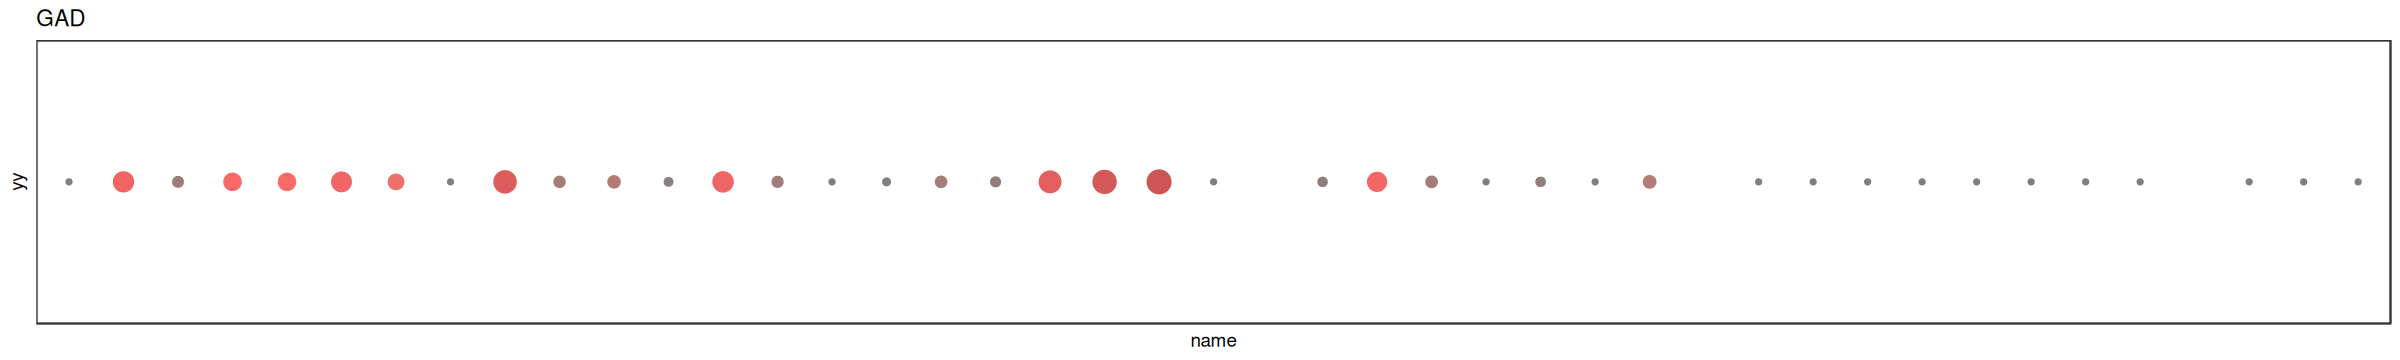

In [7]:
options(repr.plot.width = 20, repr.plot.height = 3)

md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(size = gad_man, colour = gad_man)) + 
scale_color_gradientn(colors = c("grey50","indianred1", "indianred2", "indianred3")) +
  theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("GAD") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/gad.svg", width = 23, height = 3, units = "cm")

Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


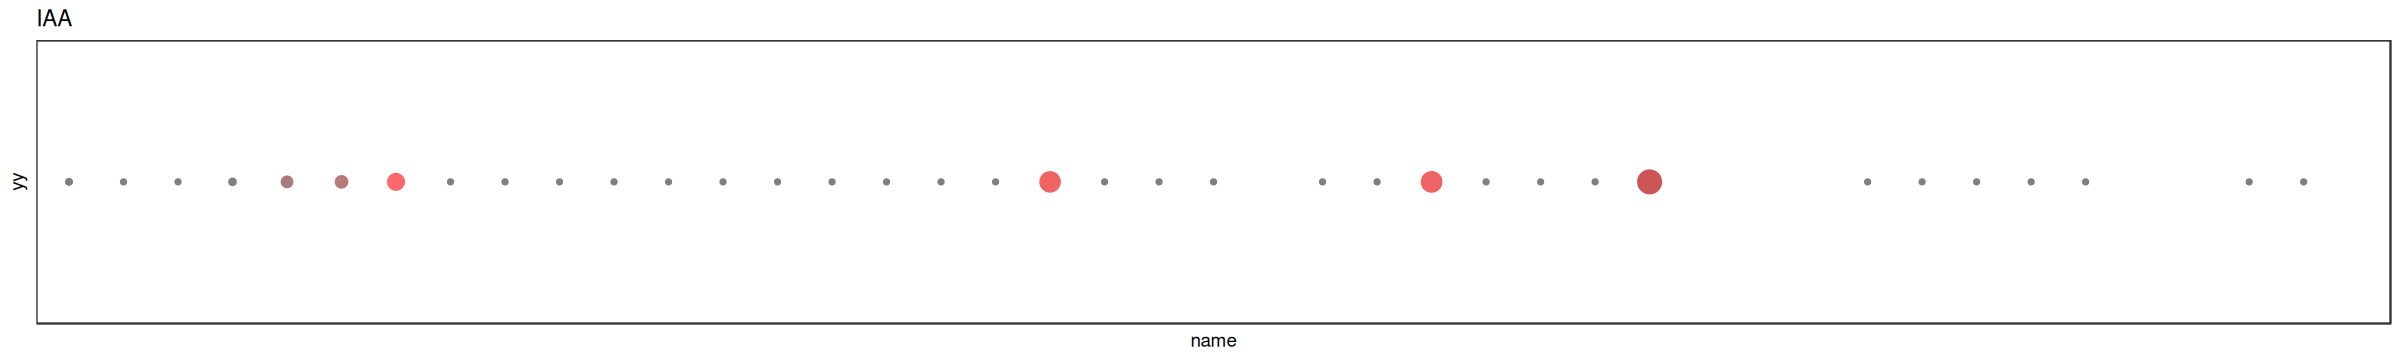

In [8]:
options(repr.plot.width = 20, repr.plot.height = 3)

md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(size = iaa_man, colour = iaa_man)) + 
scale_color_gradientn(colors = c("grey50","indianred1", "indianred2", "indianred3")) +
   theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("IAA") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/iaa.svg", width = 23, height = 3, units = "cm")

Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


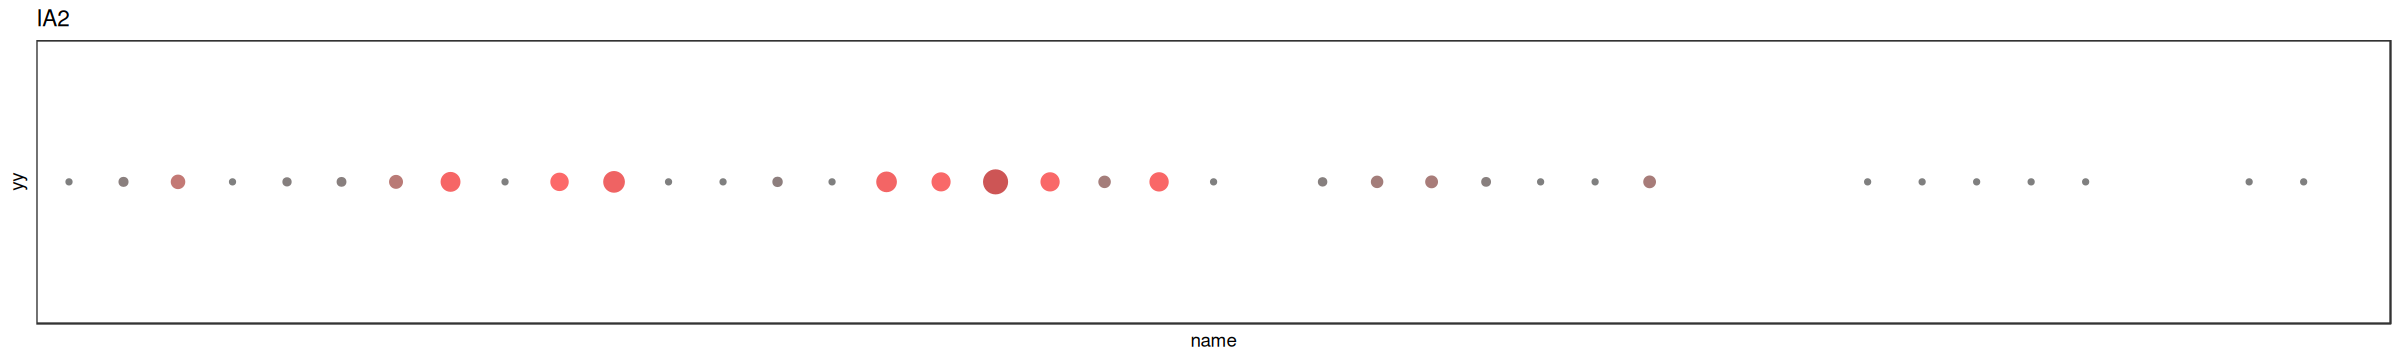

In [9]:
md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(size = ia2_man, colour = ia2_man)) + 
scale_color_gradientn(colors = c("grey50","indianred1", "indianred2", "indianred3")) +
   theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("IA2") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/ia2.svg", width = 23, height = 3, units = "cm")

Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”


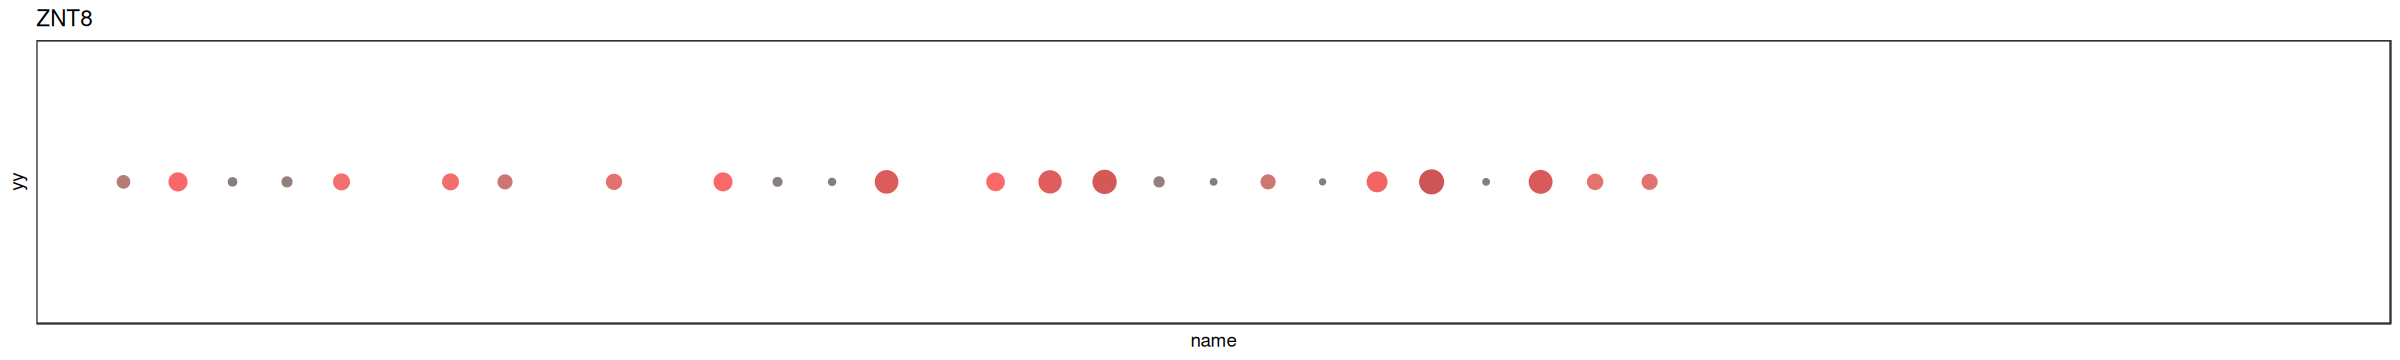

In [10]:
md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(size = znt8_man, colour = znt8_man)) + 
scale_color_gradientn(colors = c("grey50","indianred1", "indianred2", "indianred3")) +
  theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("ZNT8") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/znt8.svg", width = 23, height = 3, units = "cm")

## Autoantibodies - positive/negative

In [11]:
md  %>% filter(time_taken == "T0")   %>% dplyr::select(gad_man)  %>% summary()

    gad_man      
 Min.   : 0.600  
 1st Qu.: 0.600  
 Median : 3.905  
 Mean   :19.913  
 3rd Qu.:31.285  
 Max.   :99.410  
 NA's   :3       

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


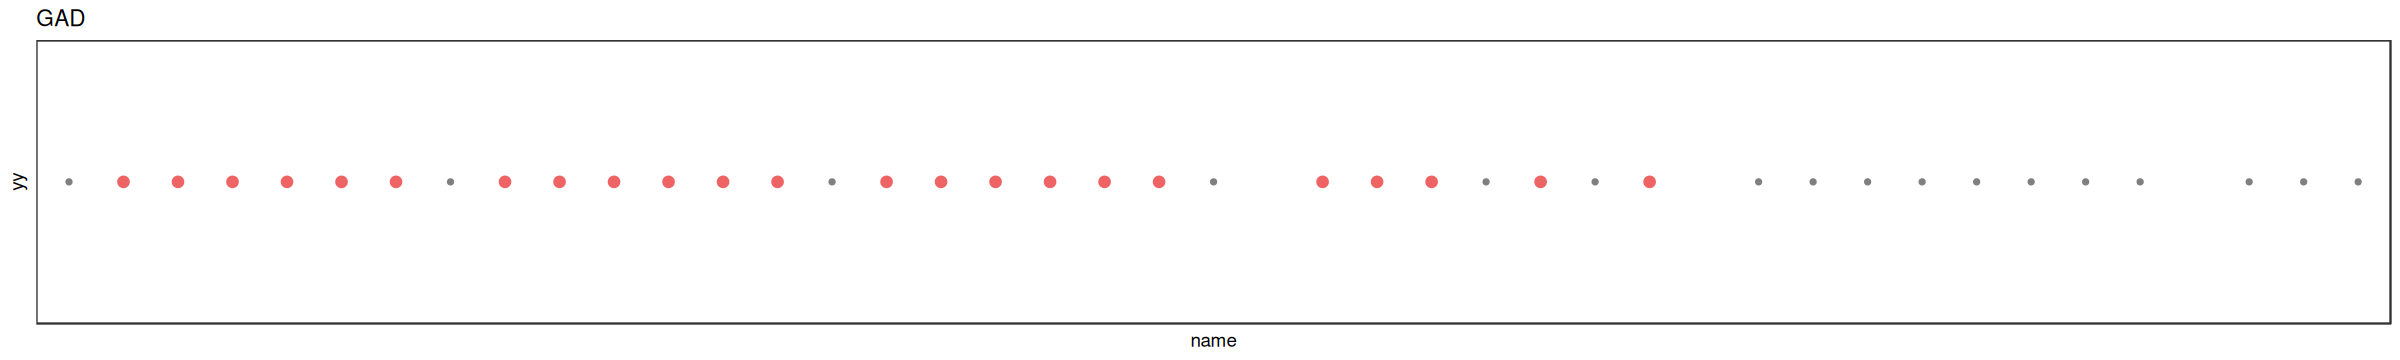

In [12]:
options(repr.plot.width = 20, repr.plot.height = 3)

md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(size = gad_man>0.6, colour = gad_man>0.6)) + 
scale_color_manual(values = c("grey50","indianred2", "indianred3")) +
scale_size_manual(values = c(1,2.5)) +
  theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("GAD") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/gad_2.svg", width = 23, height = 3, create.dir = TRUE, units = "cm")

In [13]:
md  %>% filter(time_taken == "T0")   %>% dplyr::select(iaa_man)  %>% summary()

    iaa_man     
 Min.   : 0.20  
 1st Qu.: 0.20  
 Median : 0.20  
 Mean   : 1.27  
 3rd Qu.: 0.20  
 Max.   :13.45  
 NA's   :7      

Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


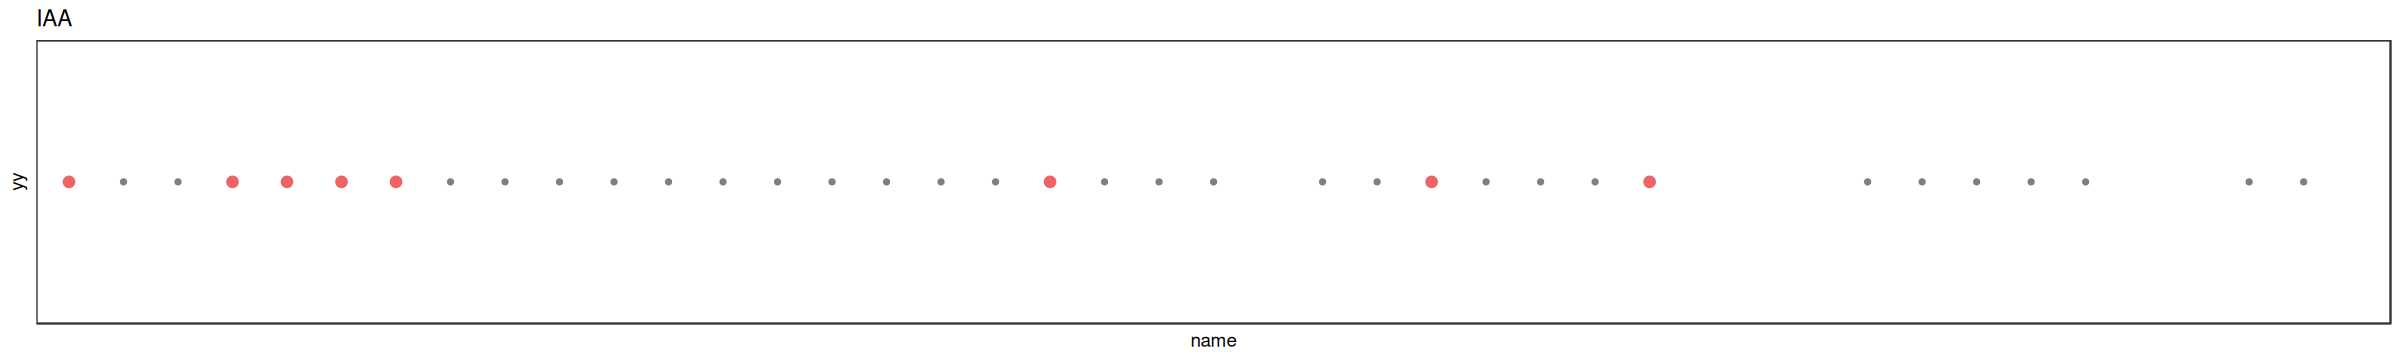

In [14]:
options(repr.plot.width = 20, repr.plot.height = 3)

md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(size = iaa_man>0.2, colour = iaa_man>0.2)) + 
scale_color_manual(values = c("grey50","indianred2", "indianred3")) +
scale_size_manual(values = c(1,2.5)) +
  theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("IAA") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/iaa_2.svg", width = 23, height = 3, units = "cm")

In [15]:
md  %>% filter(time_taken == "T0")   %>% dplyr::select(ia2_man)  %>% summary()

    ia2_man      
 Min.   : 0.800  
 1st Qu.: 0.800  
 Median : 1.750  
 Mean   : 8.801  
 3rd Qu.: 8.835  
 Max.   :55.530  
 NA's   :7       

Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 7 rows containing missing values or values outside the scale range
(`geom_point()`).”


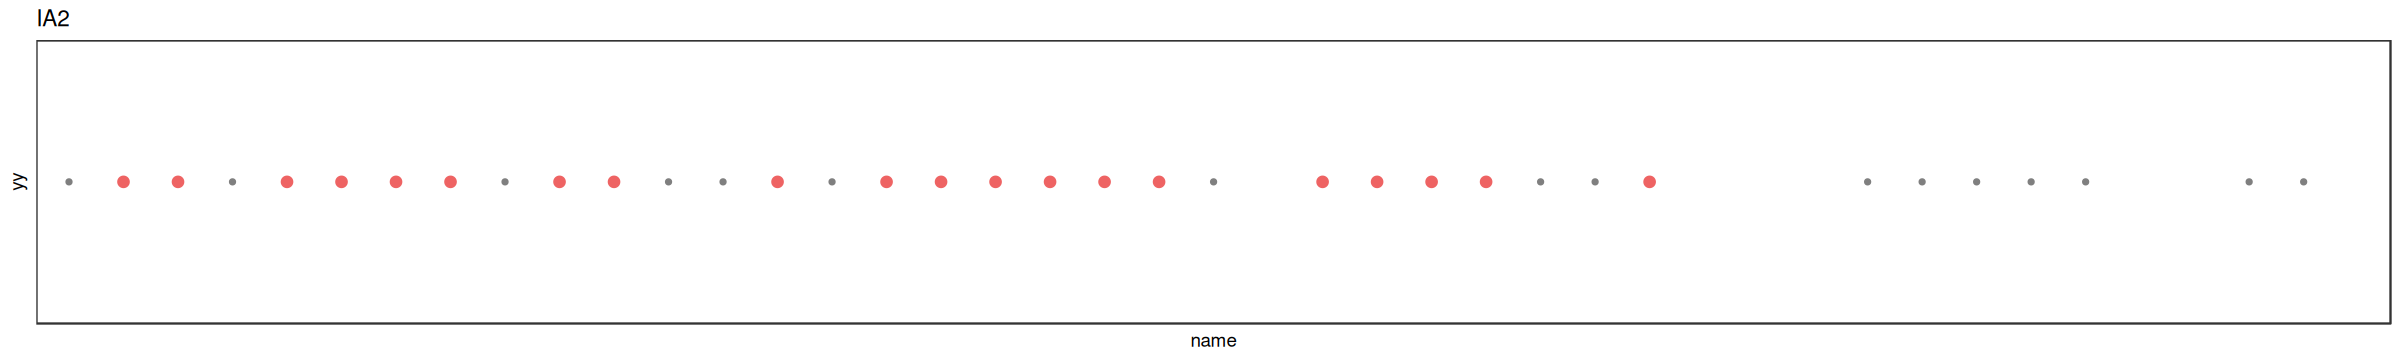

In [16]:
md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(size = ia2_man>0.8, colour = ia2_man>0.8)) + 
scale_color_manual(values = c("grey50","indianred2", "indianred3")) +
scale_size_manual(values = c(1,2.5)) +
   theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("IA2") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/ia2_2.svg", width = 23, height = 3, units = "cm")

In [17]:
md  %>% filter(time_taken == "T0")   %>% dplyr::select(znt8_man)  %>% summary()

    znt8_man       
 Min.   :   5.733  
 1st Qu.:  94.918  
 Median : 504.445  
 Mean   : 656.626  
 3rd Qu.: 867.615  
 Max.   :1956.375  
 NA's   :18        

Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”


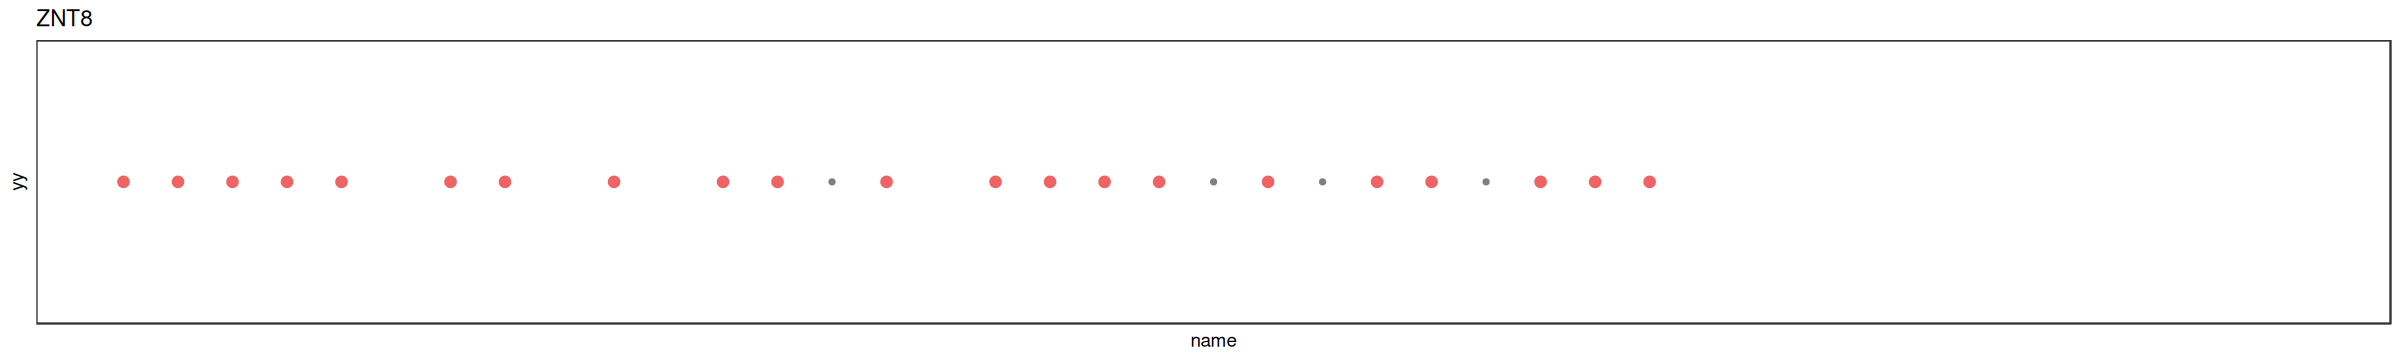

In [18]:
md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(size = znt8_man>15, colour = znt8_man>15)) + 
scale_color_manual(values = c("grey50","indianred2", "indianred3")) +
scale_size_manual(values = c(1,2.5)) +
  theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("ZNT8") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/znt8_2.svg", width = 23, height = 3, units = "cm")

## Categorical metadata

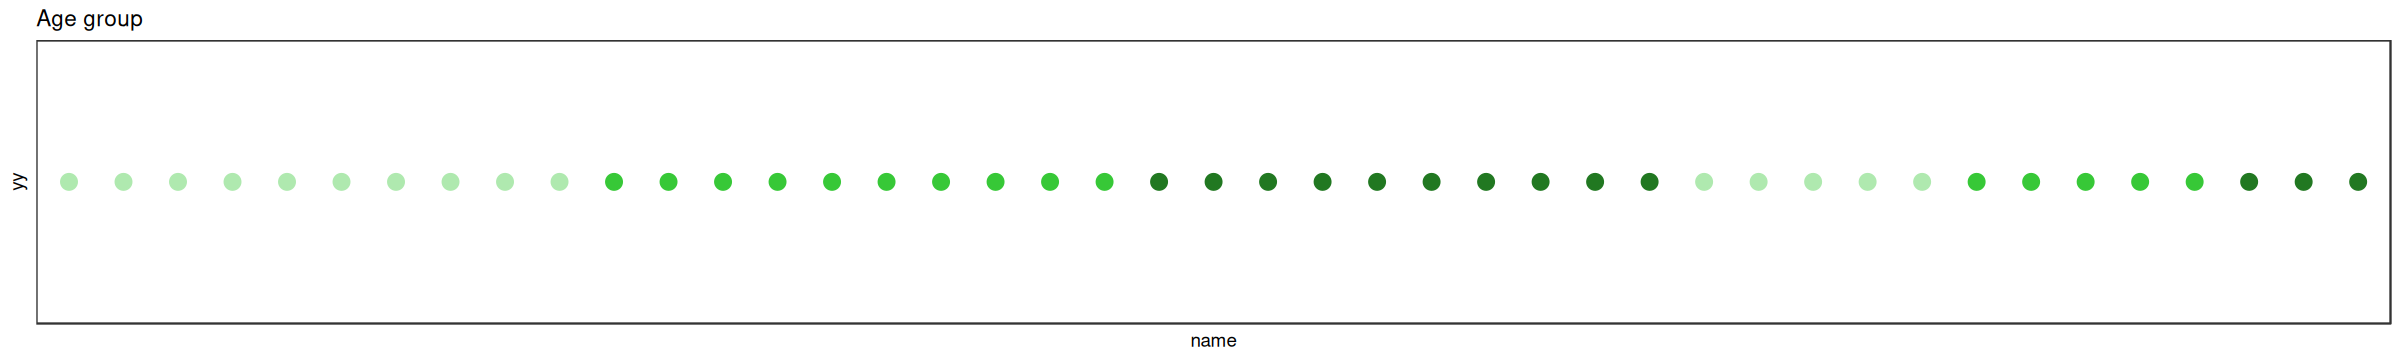

In [19]:
md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(colour = as.factor(age_group)), size = 4) + 
scale_color_manual(values = c("#afe9afff","#37c837ff", "#217821ff")) +
  theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("Age group") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/age.svg", width = 23, height = 3, units = "cm")

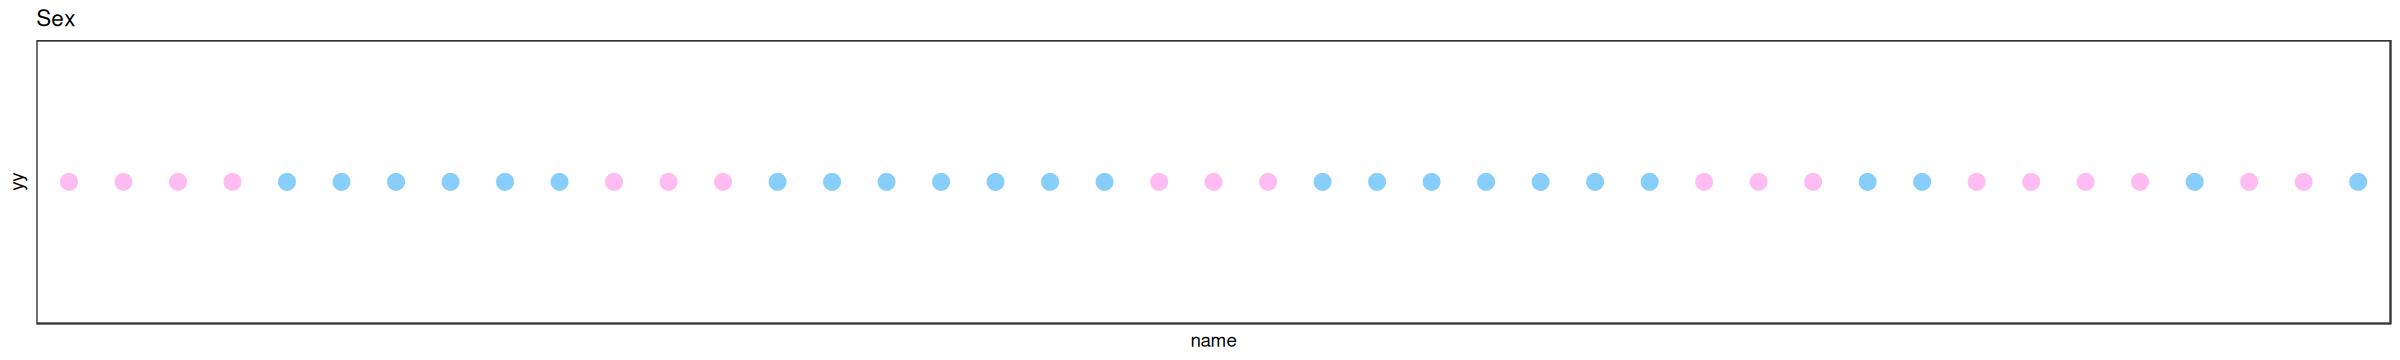

In [20]:
md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(colour = as.factor(sex)), size = 4) + 
scale_color_manual(values = c("#ffbcf2ff","#87cefaff")) +
 theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("Sex") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/sex.svg", width = 23, height = 3, units = "cm")

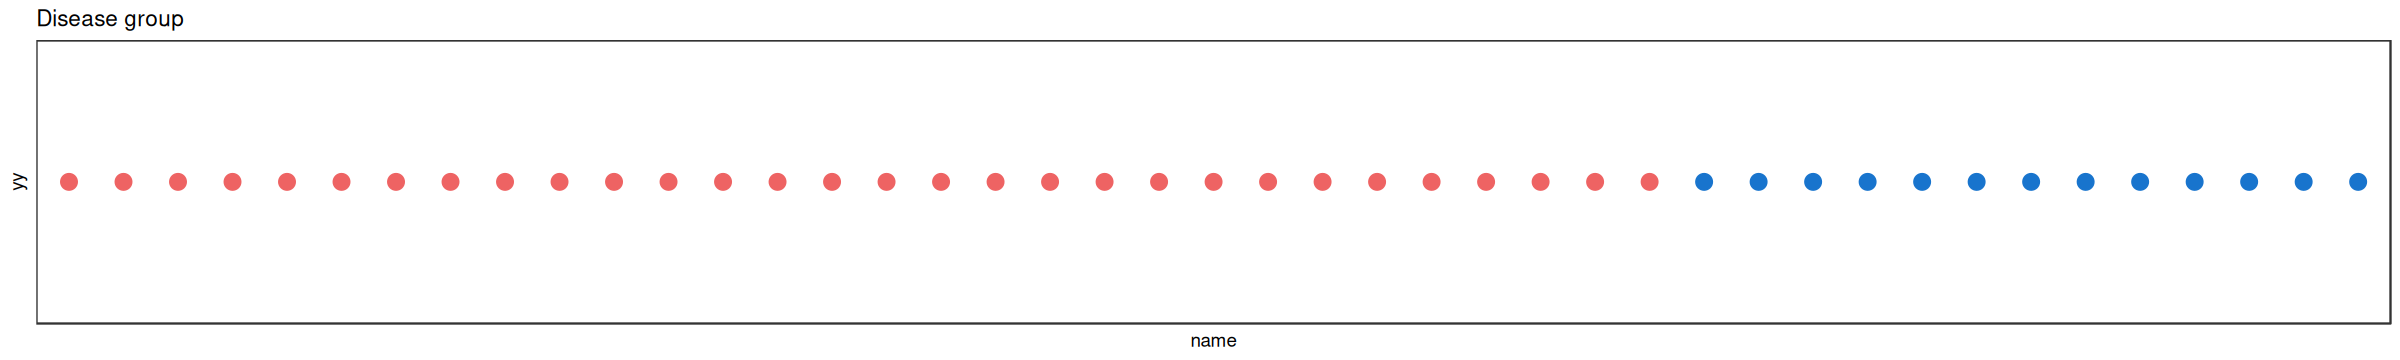

In [21]:
md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(colour = as.factor(substr(patient,1,1))), size = 4) + 
scale_color_manual(values = c("indianred2","dodgerblue3")) +
  theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("Disease group") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/disease.svg", width = 23, height = 3, units = "cm")

In [22]:
colnames(md)

[1] "patient"                     "time_taken"                 
 [3] "age_taken"                   "Patient_Time"               
 [5] "age_group"                   "sex"                        
 [7] "hba1c_man"                   "ph_man"                     
 [9] "ahco3_man"                   "random_cpeptide_man"        
[11] "bh_man"                      "bh_man_sds"                 
[13] "bw_man"                      "bw_man_sds"                 
[15] "bmi_man"                     "bmi_man_sds"                
[17] "gad_man"                     "iaa_man"                    
[19] "ia2_man"                     "znt8_man"                   
[21] "fasting_cpept_1"             "wbc"                        
[23] "lymph_abs"                   "mon_abs"                    
[25] "neutr_abs"                   "eoz_abs"                    
[27] "baz_abs"                     "lymph_perc"                 
[29] "mon_perc"                    "neutr_perc"                 
[31] "eoz_perc"                    "baz_perc"                   
[33] "tdd_1"                       "tdd_per_kg_1"               
[35] "fasting_cpept_T1"            "idaa1c"                     
[37] "part_remission_y_n"          "c_peptide_change"           
[39] "c_peptide_change_perc"       "HLA_A1"                     
[41] "HLA_A2"                      "HLA_B1"                     
[43] "HLA_B2"                      "HLA_C1"                     
[45] "HLA_C2"                      "HLA_DMA1"                   
[47] "HLA_DMA2"                    "HLA_DMB1"                   
[49] "HLA_DMB2"                    "HLA_DOA1"                   
[51] "HLA_DOA2"                    "HLA_DPA11"                  
[53] "HLA_DPA12"                   "HLA_DPB11"                  
[55] "HLA_DPB12"                   "HLA_DQA11"                  
[57] "HLA_DQA12"                   "HLA_DQB11"                  
[59] "HLA_DQB12"                   "HLA_DRA1"                   
[61] "HLA_DRA2"                    "HLA_DRB11"                  
[63] "HLA_DRB12"                   "HLA_E1"                     
[65] "HLA_E2"                      "HLA_F1"                     
[67] "HLA_F2"                      "sample"                     
[69] "pct_CD8_of_live"             "pct_naive_of_CD8"           
[71] "pct_eff_of_CD8"              "pct_CD4_of_live"            
[73] "pct_naive_of_CD4"            "pct_eff_of_CD4"             
[75] "sort_ratio_naive_to_eff_CD8" "sort_ratio_naive_to_eff_CD4"
[77] "yy"                          "name"

In [23]:
md  <- md  %>% mutate(dq2 = ifelse((HLA_DQA11 == "DQA1*05:01:01" | HLA_DQA12 == "DQA1*05:01:01") &
                                   (HLA_DQB11 == "DQB1*02:01:01" | HLA_DQB12 == "DQB1*02:01:01"),"DQ2",
                                   "Other"),
                      dq8 = ifelse((HLA_DQA11 == "DQA1*03:01:01" | HLA_DQA12 == "DQA1*03:01:01") &
                                   (HLA_DQB11 == "DQB1*03:02:01" | HLA_DQB12 == "DQB1*03:02:01"),"DQ8",
                                   "Other"))  %>% mutate(
                      dq2_8 = ifelse(dq2 == "DQ2" & dq8 == "DQ8","DQ2_8",
                                     ifelse(dq2 == "DQ2","DQ2", ifelse(dq8 == "DQ8","DQ8","Other"))))
                     

In [24]:
md  %>% dplyr::select(patient, dq2, dq8, dq2_8)

patient,dq2,dq8,dq2_8
<dbl>,<chr>,<chr>,<chr>
101,DQ2,DQ8,DQ2_8
102,Other,DQ8,DQ8
103,DQ2,DQ8,DQ2_8
104,DQ2,DQ8,DQ2_8
105,DQ2,DQ8,DQ2_8
106,Other,DQ8,DQ8
107,DQ2,DQ8,DQ2_8
108,DQ2,Other,DQ2
109,DQ2,Other,DQ2


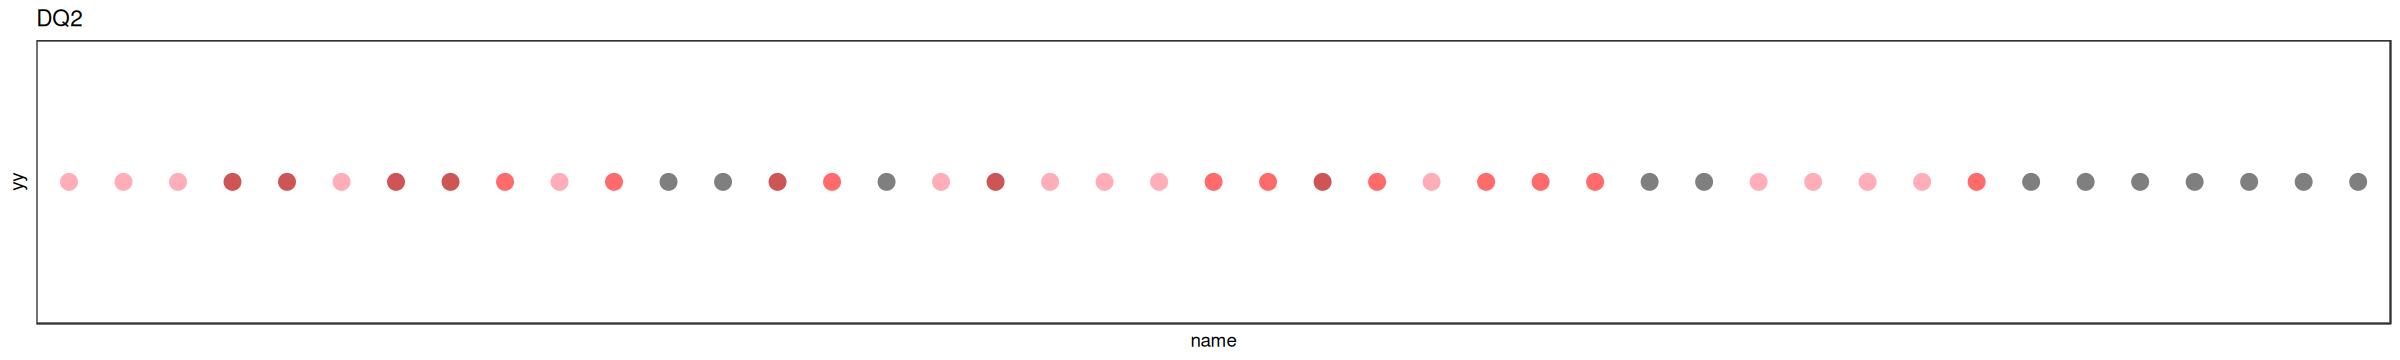

In [25]:
md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(colour = as.factor(dq2_8)), size = 4) + 
scale_color_manual(values = c("#ff6a6aff","#cd5555ff","#ffaeb9ff","grey50")) +
  theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("DQ2") + NoLegend()
ggsave("../figures/cohort_characterization/basic_metadata/dq2.svg", width = 23, height = 3, units = "cm")

In [26]:
md  %>% colnames

[1] "patient"                     "time_taken"                 
 [3] "age_taken"                   "Patient_Time"               
 [5] "age_group"                   "sex"                        
 [7] "hba1c_man"                   "ph_man"                     
 [9] "ahco3_man"                   "random_cpeptide_man"        
[11] "bh_man"                      "bh_man_sds"                 
[13] "bw_man"                      "bw_man_sds"                 
[15] "bmi_man"                     "bmi_man_sds"                
[17] "gad_man"                     "iaa_man"                    
[19] "ia2_man"                     "znt8_man"                   
[21] "fasting_cpept_1"             "wbc"                        
[23] "lymph_abs"                   "mon_abs"                    
[25] "neutr_abs"                   "eoz_abs"                    
[27] "baz_abs"                     "lymph_perc"                 
[29] "mon_perc"                    "neutr_perc"                 
[31] "eoz_perc"                    "baz_perc"                   
[33] "tdd_1"                       "tdd_per_kg_1"               
[35] "fasting_cpept_T1"            "idaa1c"                     
[37] "part_remission_y_n"          "c_peptide_change"           
[39] "c_peptide_change_perc"       "HLA_A1"                     
[41] "HLA_A2"                      "HLA_B1"                     
[43] "HLA_B2"                      "HLA_C1"                     
[45] "HLA_C2"                      "HLA_DMA1"                   
[47] "HLA_DMA2"                    "HLA_DMB1"                   
[49] "HLA_DMB2"                    "HLA_DOA1"                   
[51] "HLA_DOA2"                    "HLA_DPA11"                  
[53] "HLA_DPA12"                   "HLA_DPB11"                  
[55] "HLA_DPB12"                   "HLA_DQA11"                  
[57] "HLA_DQA12"                   "HLA_DQB11"                  
[59] "HLA_DQB12"                   "HLA_DRA1"                   
[61] "HLA_DRA2"                    "HLA_DRB11"                  
[63] "HLA_DRB12"                   "HLA_E1"                     
[65] "HLA_E2"                      "HLA_F1"                     
[67] "HLA_F2"                      "sample"                     
[69] "pct_CD8_of_live"             "pct_naive_of_CD8"           
[71] "pct_eff_of_CD8"              "pct_CD4_of_live"            
[73] "pct_naive_of_CD4"            "pct_eff_of_CD4"             
[75] "sort_ratio_naive_to_eff_CD8" "sort_ratio_naive_to_eff_CD4"
[77] "yy"                          "name"                       
[79] "dq2"                         "dq8"                        
[81] "dq2_8"

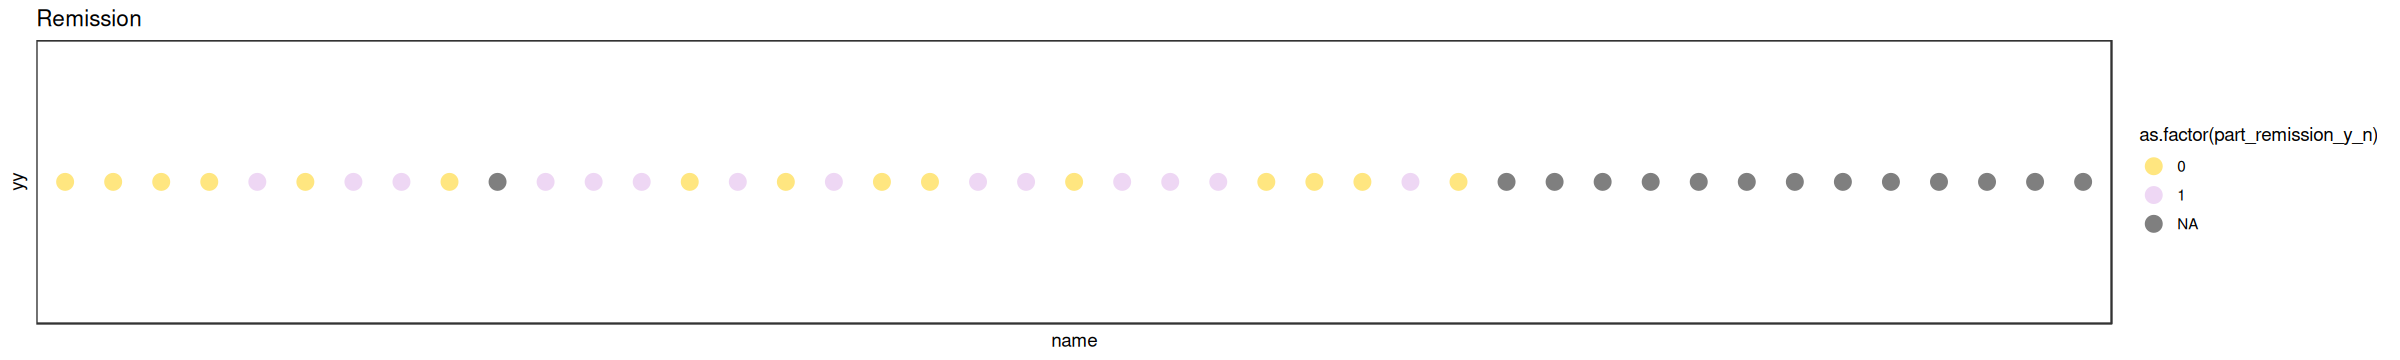

In [27]:
md  %>% filter(time_taken == "T0")  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(colour = as.factor(part_remission_y_n)), size = 4) + 
scale_color_manual(values = c("#ffe680ff","#eed7f4ff","white")) +
  theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("Remission") 
ggsave("../figures/cohort_characterization/basic_metadata/remission.svg", width = 23, height = 3, units = "cm")

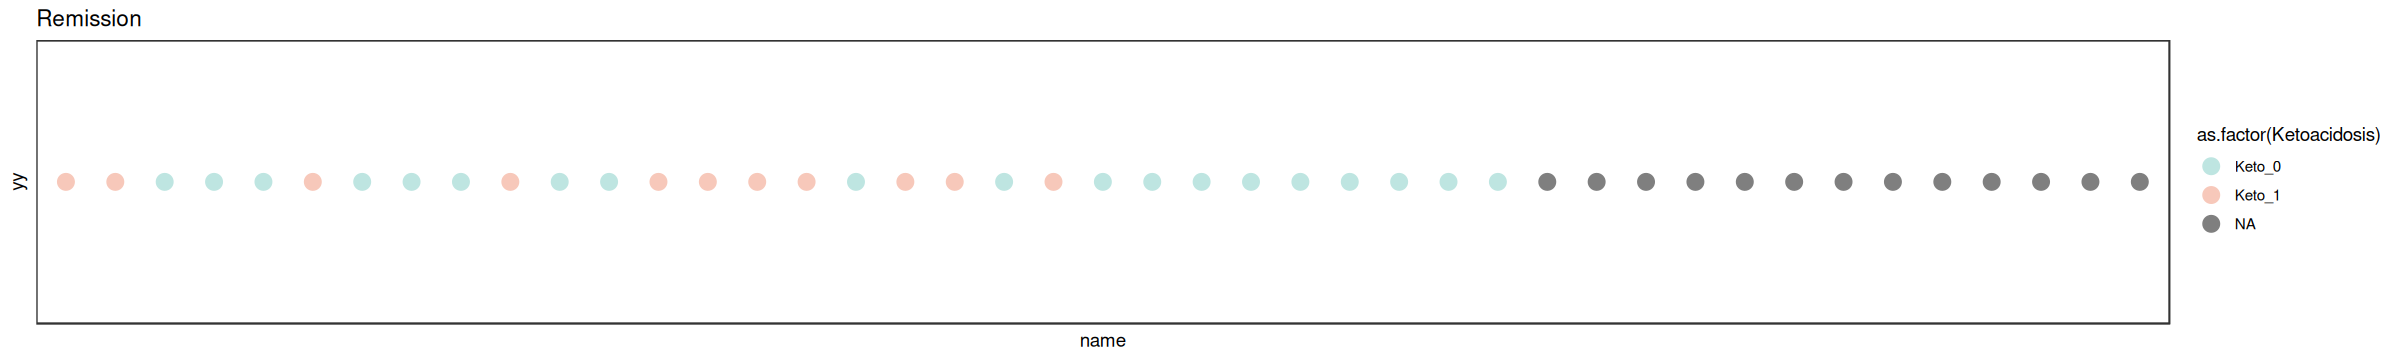

In [28]:
md  %>% filter(time_taken == "T0")  %>%
mutate(Ketoacidosis = ifelse(ph_man<7.3,"Keto_1","Keto_0"))  %>% 
ggplot(aes(x = name, y = yy)) + geom_point(aes(colour = as.factor(Ketoacidosis)), size = 4) + 
scale_color_manual(values = c("#bee5e1ff","#f7c8baff","white")) +
  theme_bw() + theme(axis.text.x = element_blank(),
                    axis.text.y = element_blank(),
                    axis.ticks = element_blank(),
                    panel.grid = element_blank(),
                    ) + ggtitle("Remission") 
ggsave("../figures/cohort_characterization/basic_metadata/ketoacidosis.svg", width = 23, height = 3, units = "cm")

# Fig. S1: Blood test results

## Clinical metadata

In [29]:
library(ggbeeswarm)
library(ggpubr)
ggtheme <- function() {
  theme(
    axis.text = element_text(size = 20),
    axis.title = element_text(size = 20),
      plot.title = element_text(size = 20),
    text = element_text(size = 20, colour = "black", family = "Arial"),
    legend.text = element_text(size = 20),
    legend.key.size = unit(10, units = "points")) }

In [64]:
library(readxl)
md <- read_excel("../data/metadata_v07.xlsx")
df <- as.data.frame(md)
df

patient,time_taken,age_taken,Patient_Time,age_group,sex,hba1c_man,ph_man,ahco3_man,random_cpeptide_man,⋯,HLA_F2,sample,pct_CD8_of_live,pct_naive_of_CD8,pct_eff_of_CD8,pct_CD4_of_live,pct_naive_of_CD4,pct_eff_of_CD4,sort_ratio_naive_to_eff_CD8,sort_ratio_naive_to_eff_CD4
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,T0,2.138261,101 T0,1,m,137,7.43,13.2,99.9,⋯,F*01:01:01,101,19.1,50.0,47.8,49.2,79.5,17.8,0.2,0.2
102,T0,3.252567,102 T0,1,m,117,7.28,11.1,157.9,⋯,F*01:01:01,102,29.0,62.5,35.3,40.9,79.2,18.3,0.2,0.2
103,T0,7.816564,103 T0,2,m,102,7.27,9.4,265.8,⋯,F*01:01:02,103,24.9,69.7,29.3,46.4,60.7,36.6,0.2,0.2
104,T0,16.547570,104 T0,3,m,92,7.31,24.2,210.7,⋯,F*01:01:01,104,27.0,59.3,40.0,43.7,77.4,21.4,0.2,0.2
105,T0,3.731691,105 T0,1,m,87,7.36,21.4,251.8,⋯,F*01:01:01,105,34.2,83.8,15.7,42.6,81.8,17.0,0.2,0.2
106,T0,1.434634,106 T0,1,f,103,7.04,4.7,66.8,⋯,F*01:01:01,106,28.1,83.0,15.9,47.6,78.7,19.9,0.2,0.2
107,T0,4.355921,107 T0,1,m,96,7.43,19.6,258.6,⋯,F*01:01:02,107,30.2,73.7,25.6,50.8,86.2,12.5,0.2,0.2
108,T0,7.786448,108 T0,2,f,106,7.33,24.5,192.3,⋯,F*01:03:01,108,28.4,46.8,52.1,37.0,70.6,28.4,0.2,0.2
109,T0,5.705681,109 T0,1,m,118,7.38,12.2,166.7,⋯,F*01:01:01,109,18.8,77.9,20.2,47.3,68.9,28.0,0.2,0.2


In [31]:
colnames(df)

[1] "patient"                     "time_taken"                 
 [3] "age_taken"                   "Patient_Time"               
 [5] "age_group"                   "sex"                        
 [7] "hba1c_man"                   "ph_man"                     
 [9] "ahco3_man"                   "random_cpeptide_man"        
[11] "bh_man"                      "bh_man_sds"                 
[13] "bw_man"                      "bw_man_sds"                 
[15] "bmi_man"                     "bmi_man_sds"                
[17] "gad_man"                     "iaa_man"                    
[19] "ia2_man"                     "znt8_man"                   
[21] "fasting_cpept_1"             "wbc"                        
[23] "lymph_abs"                   "mon_abs"                    
[25] "neutr_abs"                   "eoz_abs"                    
[27] "baz_abs"                     "lymph_perc"                 
[29] "mon_perc"                    "neutr_perc"                 
[31] "eoz_perc"                    "baz_perc"                   
[33] "tdd_1"                       "tdd_per_kg_1"               
[35] "fasting_cpept_T1"            "idaa1c"                     
[37] "part_remission_y_n"          "c_peptide_change"           
[39] "c_peptide_change_perc"       "HLA_A1"                     
[41] "HLA_A2"                      "HLA_B1"                     
[43] "HLA_B2"                      "HLA_C1"                     
[45] "HLA_C2"                      "HLA_DMA1"                   
[47] "HLA_DMA2"                    "HLA_DMB1"                   
[49] "HLA_DMB2"                    "HLA_DOA1"                   
[51] "HLA_DOA2"                    "HLA_DPA11"                  
[53] "HLA_DPA12"                   "HLA_DPB11"                  
[55] "HLA_DPB12"                   "HLA_DQA11"                  
[57] "HLA_DQA12"                   "HLA_DQB11"                  
[59] "HLA_DQB12"                   "HLA_DRA1"                   
[61] "HLA_DRA2"                    "HLA_DRB11"                  
[63] "HLA_DRB12"                   "HLA_E1"                     
[65] "HLA_E2"                      "HLA_F1"                     
[67] "HLA_F2"                      "sample"                     
[69] "pct_CD8_of_live"             "pct_naive_of_CD8"           
[71] "pct_eff_of_CD8"              "pct_CD4_of_live"            
[73] "pct_naive_of_CD4"            "pct_eff_of_CD4"             
[75] "sort_ratio_naive_to_eff_CD8" "sort_ratio_naive_to_eff_CD4"

In [33]:
library(svglite)

In [40]:
dir.create("../figures/cohort_characterization/blood_analysis/svg", recursive = T)
dir.create("../figures/cohort_characterization/blood_analysis/png", recursive = T)

Warning message in dir.create("../figures/cohort_characterization/blood_analysis/svg", :
“'../figures/cohort_characterization/blood_analysis/svg' already exists”
Warning message in dir.create("../figures/cohort_characterization/blood_analysis/png", :
“'../figures/cohort_characterization/blood_analysis/png' already exists”


In [65]:
df

patient,time_taken,age_taken,Patient_Time,age_group,sex,hba1c_man,ph_man,ahco3_man,random_cpeptide_man,⋯,HLA_F2,sample,pct_CD8_of_live,pct_naive_of_CD8,pct_eff_of_CD8,pct_CD4_of_live,pct_naive_of_CD4,pct_eff_of_CD4,sort_ratio_naive_to_eff_CD8,sort_ratio_naive_to_eff_CD4
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,T0,2.138261,101 T0,1,m,137,7.43,13.2,99.9,⋯,F*01:01:01,101,19.1,50.0,47.8,49.2,79.5,17.8,0.2,0.2
102,T0,3.252567,102 T0,1,m,117,7.28,11.1,157.9,⋯,F*01:01:01,102,29.0,62.5,35.3,40.9,79.2,18.3,0.2,0.2
103,T0,7.816564,103 T0,2,m,102,7.27,9.4,265.8,⋯,F*01:01:02,103,24.9,69.7,29.3,46.4,60.7,36.6,0.2,0.2
104,T0,16.547570,104 T0,3,m,92,7.31,24.2,210.7,⋯,F*01:01:01,104,27.0,59.3,40.0,43.7,77.4,21.4,0.2,0.2
105,T0,3.731691,105 T0,1,m,87,7.36,21.4,251.8,⋯,F*01:01:01,105,34.2,83.8,15.7,42.6,81.8,17.0,0.2,0.2
106,T0,1.434634,106 T0,1,f,103,7.04,4.7,66.8,⋯,F*01:01:01,106,28.1,83.0,15.9,47.6,78.7,19.9,0.2,0.2
107,T0,4.355921,107 T0,1,m,96,7.43,19.6,258.6,⋯,F*01:01:02,107,30.2,73.7,25.6,50.8,86.2,12.5,0.2,0.2
108,T0,7.786448,108 T0,2,f,106,7.33,24.5,192.3,⋯,F*01:03:01,108,28.4,46.8,52.1,37.0,70.6,28.4,0.2,0.2
109,T0,5.705681,109 T0,1,m,118,7.38,12.2,166.7,⋯,F*01:01:01,109,18.8,77.9,20.2,47.3,68.9,28.0,0.2,0.2


In [43]:
df  %>% colnames

[1] "patient"                     "time_taken"                 
 [3] "age_taken"                   "Patient_Time"               
 [5] "age_group"                   "sex"                        
 [7] "hba1c_man"                   "ph_man"                     
 [9] "ahco3_man"                   "random_cpeptide_man"        
[11] "bh_man"                      "bh_man_sds"                 
[13] "bw_man"                      "bw_man_sds"                 
[15] "bmi_man"                     "bmi_man_sds"                
[17] "gad_man"                     "iaa_man"                    
[19] "ia2_man"                     "znt8_man"                   
[21] "fasting_cpept_1"             "wbc"                        
[23] "lymph_abs"                   "mon_abs"                    
[25] "neutr_abs"                   "eoz_abs"                    
[27] "baz_abs"                     "lymph_perc"                 
[29] "mon_perc"                    "neutr_perc"                 
[31] "eoz_perc"                    "baz_perc"                   
[33] "tdd_1"                       "tdd_per_kg_1"               
[35] "fasting_cpept_T1"            "idaa1c"                     
[37] "part_remission_y_n"          "c_peptide_change"           
[39] "c_peptide_change_perc"       "HLA_A1"                     
[41] "HLA_A2"                      "HLA_B1"                     
[43] "HLA_B2"                      "HLA_C1"                     
[45] "HLA_C2"                      "HLA_DMA1"                   
[47] "HLA_DMA2"                    "HLA_DMB1"                   
[49] "HLA_DMB2"                    "HLA_DOA1"                   
[51] "HLA_DOA2"                    "HLA_DPA11"                  
[53] "HLA_DPA12"                   "HLA_DPB11"                  
[55] "HLA_DPB12"                   "HLA_DQA11"                  
[57] "HLA_DQA12"                   "HLA_DQB11"                  
[59] "HLA_DQB12"                   "HLA_DRA1"                   
[61] "HLA_DRA2"                    "HLA_DRB11"                  
[63] "HLA_DRB12"                   "HLA_E1"                     
[65] "HLA_E2"                      "HLA_F1"                     
[67] "HLA_F2"                      "sample"                     
[69] "pct_CD8_of_live"             "pct_naive_of_CD8"           
[71] "pct_eff_of_CD8"              "pct_CD4_of_live"            
[73] "pct_naive_of_CD4"            "pct_eff_of_CD4"             
[75] "sort_ratio_naive_to_eff_CD8" "sort_ratio_naive_to_eff_CD4"

In [66]:
plot_list <- list()
j = 1

for(i in c(7,21,22:32)){
    
  df_filt <- df %>% mutate(group = if_else(substr(patient,1,1)=="1","Dia","Ctrl")) %>% 
    mutate(group = paste(group, time_taken))
     df_filt <- df_filt[,c(1:10,77,i)]
  colnames(df_filt) <- c(colnames(df_filt[1:10]), "group","value")
  df_filt$value <- as.numeric(df_filt$value)

    plot  <- df_filt  %>% 
 ggplot(aes(x = group, y = value)) + 
 geom_violin(alpha = 0.3, aes(fill = group), scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = group), cex = 3, 
                shape = 21, color = "black", corral = "random") +
 stat_compare_means(label = "p.format")+
scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ggtitle(colnames(df)[i]) + ggtheme()
    
ggsave(paste0("../figures/cohort_characterization/blood_analysis/png/",paste0("plot_",i),".png"), width = 12, height = 10, units = "cm")
ggsave(paste0("../figures/cohort_characterization/blood_analysis/svg/",paste0("plot_",i),".svg"), width = 12, height = 10, units = "cm")
    
    plot_list[[j]]  <- plot
    
    j = j+1
}

Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_compare_means()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_compare_means()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 4 rows containing non-finite outsid

Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_compare_means()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_compare_means()`).”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 3 rows containing non-finite outside

Paired statistics separately for the two groups

In [67]:
plot_list <- list()
j = 1

for(i in c(7,21,22:32)){
    
    df_filt <- df %>% mutate(Condition = if_else(substr(patient,1,1)=="1","Dia","Ctrl")) %>% 
    mutate(Condition = paste(Condition, time_taken))  %>% 
    mutate(Condition = ifelse(Condition == "Ctrl T1", "Ctrl T0", Condition))
     df_filt <- df_filt[,c(1:10,77,i)]
  colnames(df_filt) <- c(colnames(df_filt[1:10]), "Condition","value")
  df_filt$value <- as.numeric(df_filt$value)

    plot  <- df_filt  %>% 
 ggplot(aes(x = Condition, y = value)) + 
 geom_violin(alpha = 0.3, aes(fill = Condition), scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", comparisons = list(c(1,2)), 
                           size = 5, vjust = 0.3, label = "p.format") +
    scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ggtitle(colnames(df)[i]) + ggtheme() + NoLegend()
    
 ###############   
        df_filt <- df %>% mutate(Condition = if_else(substr(patient,1,1)=="1","Dia","Ctrl")) %>% 
    mutate(Condition = paste(Condition, time_taken))  %>% 
    dplyr::filter(Condition %in% c("Dia T0", "Dia T1"))
     df_filt <- df_filt[,c(1:10,77,i)]
  colnames(df_filt) <- c(colnames(df_filt[1:10]), "Condition","value")
  df_filt$value <- as.numeric(df_filt$value)
    
df_filt <- df_filt  %>% dplyr::select(patient, time_taken, value)  %>% 
pivot_wider(names_from = time_taken, values_from = value) 
colnames(df_filt)  <- c("Patient_ID","Time0","Time1")
 df_filt <- df_filt %>% dplyr::filter(!is.na(Time1)&(!is.na(Time0)))
    df_filt <- df_filt  %>% pivot_longer(!Patient_ID, names_to = "TimePoint", values_to = "value")
    
plot2 <- df_filt  %>% 
  ggplot(aes(x = TimePoint,
             y = value)) +
geom_violin(alpha = 0.3, scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", paired = TRUE, 
                           size = 5, vjust = 0.3, label = "p.format") +
scale_fill_manual(values = c("#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ylim(0,NA)+
  plot_annotation(
    title = paste(stringr::str_replace_all(string = colnames(df)[i], pattern = "/", replacement = "\n")) ,
    theme = theme(plot.title = element_text(size = 8), 
                  plot.subtitle = element_text(size = 8),
                 axis.text.x = element_blank())) + ggtheme() + NoLegend()
  
   plot  <- plot + plot2 
    plot
 #################   
    
ggsave(paste0("../figures/cohort_characterization/blood_analysis/png_paired/",paste0("plot_",i),".png"), 
       width = 15, height = 10, units = "cm", create.dir = T)
ggsave(paste0("../figures/cohort_characterization/blood_analysis/svg_paired/",paste0("plot_",i),".svg"), 
       width = 15, height = 10, units = "cm", create.dir = T)
    
    plot_list[[j]]  <- plot
    
    j = j+1
}

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
✔ Created directory: ../figures/cohort_characterization/blood_analysis/png_paired.

Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 5 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message in wilcox.test.default(c(NA, NA, 34, 37, 36, 32, 35, 32, 39, 28, :
“cannot compute exact p-value with ties”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`).”
✔ Created directory: ../figures/cohort_characterization/blood_analysis/svg_paired.

Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 5 rows containing non-finite outside the scale range
(`stat_summary()`

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message in wilcox.test.default(c(NA, NA, 0.07, 0.18, 0.16, 0.13, 0.3, 0.16, :
“cannot compute exact p-value with ties”
Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 3 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 3 rows containing non-f

## C-peptide correlations

In [49]:
df  %>% colnames

[1] "patient"                     "time_taken"                 
 [3] "age_taken"                   "Patient_Time"               
 [5] "age_group"                   "sex"                        
 [7] "hba1c_man"                   "ph_man"                     
 [9] "ahco3_man"                   "random_cpeptide_man"        
[11] "bh_man"                      "bh_man_sds"                 
[13] "bw_man"                      "bw_man_sds"                 
[15] "bmi_man"                     "bmi_man_sds"                
[17] "gad_man"                     "iaa_man"                    
[19] "ia2_man"                     "znt8_man"                   
[21] "fasting_cpept_1"             "wbc"                        
[23] "lymph_abs"                   "mon_abs"                    
[25] "neutr_abs"                   "eoz_abs"                    
[27] "baz_abs"                     "lymph_perc"                 
[29] "mon_perc"                    "neutr_perc"                 
[31] "eoz_perc"                    "baz_perc"                   
[33] "tdd_1"                       "tdd_per_kg_1"               
[35] "fasting_cpept_T1"            "idaa1c"                     
[37] "part_remission_y_n"          "c_peptide_change"           
[39] "c_peptide_change_perc"       "HLA_A1"                     
[41] "HLA_A2"                      "HLA_B1"                     
[43] "HLA_B2"                      "HLA_C1"                     
[45] "HLA_C2"                      "HLA_DMA1"                   
[47] "HLA_DMA2"                    "HLA_DMB1"                   
[49] "HLA_DMB2"                    "HLA_DOA1"                   
[51] "HLA_DOA2"                    "HLA_DPA11"                  
[53] "HLA_DPA12"                   "HLA_DPB11"                  
[55] "HLA_DPB12"                   "HLA_DQA11"                  
[57] "HLA_DQA12"                   "HLA_DQB11"                  
[59] "HLA_DQB12"                   "HLA_DRA1"                   
[61] "HLA_DRA2"                    "HLA_DRB11"                  
[63] "HLA_DRB12"                   "HLA_E1"                     
[65] "HLA_E2"                      "HLA_F1"                     
[67] "HLA_F2"                      "sample"                     
[69] "pct_CD8_of_live"             "pct_naive_of_CD8"           
[71] "pct_eff_of_CD8"              "pct_CD4_of_live"            
[73] "pct_naive_of_CD4"            "pct_eff_of_CD4"             
[75] "sort_ratio_naive_to_eff_CD8" "sort_ratio_naive_to_eff_CD4"

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 45 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 45 rows containing non-finite outside the scale range (`stat_cor()`).”
Warning message:
“Removed 45 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_stringMetric, as.graphicsAnnot(x$label)):
“font family 'Arial' not found in PostScript 

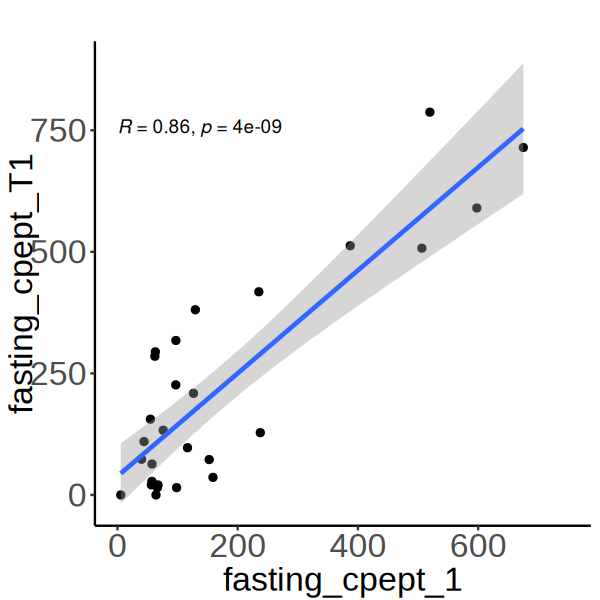

In [50]:
options(repr.plot.width = 5, repr.plot.height = 5)
  df %>%  ggplot(aes(x=fasting_cpept_1, y=fasting_cpept_T1)) +
  geom_point(shape = 16, size = 2) +
 geom_smooth(method=lm) + ggtitle("") +stat_cor() + theme_classic() + ggtheme() +
 scale_y_continuous() + 
 scale_x_continuous(expand = c(0.05,0), limits = c(0,750))  


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 45 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 45 rows containing non-finite outside the scale range (`stat_cor()`).”
Warning message:
“Removed 45 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :


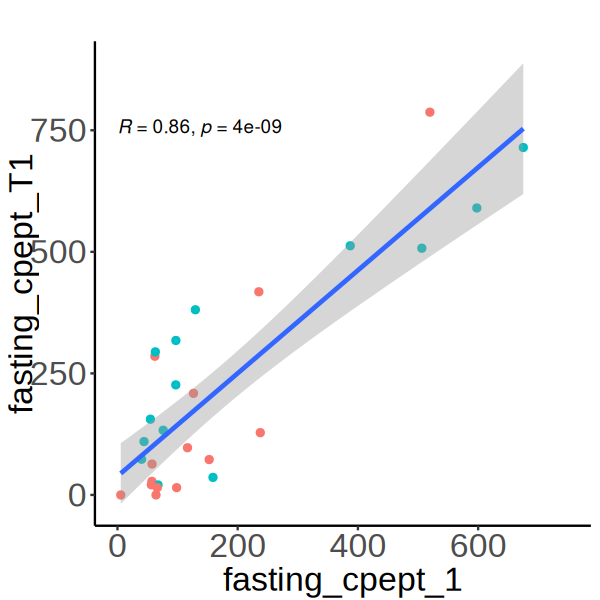

In [51]:
options(repr.plot.width = 5, repr.plot.height = 5)
  df %>%  ggplot(aes(x=fasting_cpept_1, y=fasting_cpept_T1)) +
  geom_point(shape = 16, size = 2, aes(color = factor(part_remission_y_n))) +
 geom_smooth(method=lm) + ggtitle("") +stat_cor() + theme_classic() + ggtheme() +
 scale_y_continuous() + NoLegend() +
 scale_x_continuous(expand = c(0.05,0), limits = c(0,750))  

ggsave("../figures/cohort_characterization/blood_analysis/png/corr_fasting_T0_T1.png", 
       width = 10, height = 10, units = "cm")
ggsave("../figures/cohort_characterization/blood_analysis/png/corr_fasting_T0_T1.svg", 
       width = 10, height = 10, units = "cm")

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 43 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 43 rows containing non-finite outside the scale range (`stat_cor()`).”
Warning message:
“Removed 43 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“font family 'Arial' not found in PostScript font database”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :


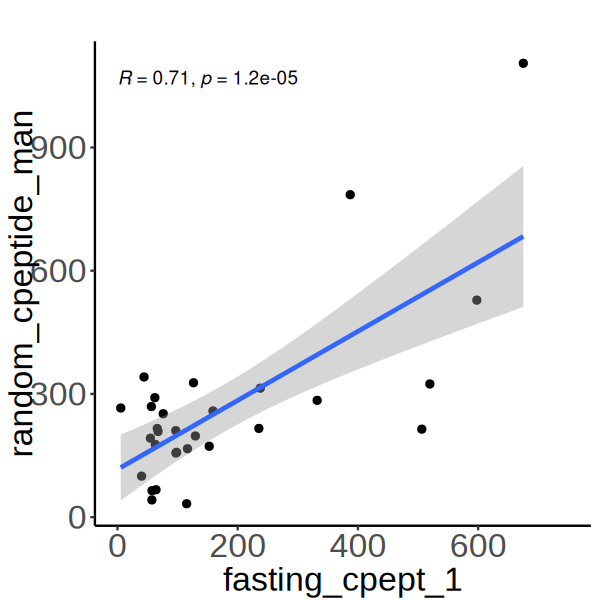

In [52]:
options(repr.plot.width = 5, repr.plot.height = 5)

df %>%  ggplot(aes(x=fasting_cpept_1, y=random_cpeptide_man)) +
  geom_point(shape = 16, size = 2) +
 geom_smooth(method=lm) + ggtitle("") +stat_cor() + theme_classic() + ggtheme() +
 scale_y_continuous() + 
 scale_x_continuous(expand = c(0.05,0), limits = c(0,750))  

ggsave("../figures/cohort_characterization/blood_analysis/png/corr_fasting_random.png", 
       width = 10, height = 10, units = "cm")
ggsave("../figures/cohort_characterization/blood_analysis/png/corr_fasting_random.svg", 
       width = 10, height = 10, units = "cm")

## FACS percentages

In [58]:
colnames(df)[c(69:76)]

[1] "pct_CD8_of_live"             "pct_naive_of_CD8"           
[3] "pct_eff_of_CD8"              "pct_CD4_of_live"            
[5] "pct_naive_of_CD4"            "pct_eff_of_CD4"             
[7] "sort_ratio_naive_to_eff_CD8" "sort_ratio_naive_to_eff_CD4"

In [59]:
df  <- df  %>%  mutate(eff_to_naive_ratio_cd4 = df$pct_eff_of_CD4/df$pct_naive_of_CD4,
                       eff_to_naive_ratio_cd8 = df$pct_eff_of_CD8/df$pct_naive_of_CD8)

In [60]:
df

patient,time_taken,age_taken,Patient_Time,age_group,sex,hba1c_man,ph_man,ahco3_man,random_cpeptide_man,⋯,pct_CD8_of_live,pct_naive_of_CD8,pct_eff_of_CD8,pct_CD4_of_live,pct_naive_of_CD4,pct_eff_of_CD4,sort_ratio_naive_to_eff_CD8,sort_ratio_naive_to_eff_CD4,eff_to_naive_ratio_cd4,eff_to_naive_ratio_cd8
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,T0,2.138261,101 T0,1,m,137,7.43,13.2,99.9,⋯,19.1,50.0,47.8,49.2,79.5,17.8,0.2,0.2,0.2238994,0.9560000
102,T0,3.252567,102 T0,1,m,117,7.28,11.1,157.9,⋯,29.0,62.5,35.3,40.9,79.2,18.3,0.2,0.2,0.2310606,0.5648000
103,T0,7.816564,103 T0,2,m,102,7.27,9.4,265.8,⋯,24.9,69.7,29.3,46.4,60.7,36.6,0.2,0.2,0.6029654,0.4203730
104,T0,16.547570,104 T0,3,m,92,7.31,24.2,210.7,⋯,27.0,59.3,40.0,43.7,77.4,21.4,0.2,0.2,0.2764858,0.6745363
105,T0,3.731691,105 T0,1,m,87,7.36,21.4,251.8,⋯,34.2,83.8,15.7,42.6,81.8,17.0,0.2,0.2,0.2078240,0.1873508
106,T0,1.434634,106 T0,1,f,103,7.04,4.7,66.8,⋯,28.1,83.0,15.9,47.6,78.7,19.9,0.2,0.2,0.2528590,0.1915663
107,T0,4.355921,107 T0,1,m,96,7.43,19.6,258.6,⋯,30.2,73.7,25.6,50.8,86.2,12.5,0.2,0.2,0.1450116,0.3473541
108,T0,7.786448,108 T0,2,f,106,7.33,24.5,192.3,⋯,28.4,46.8,52.1,37.0,70.6,28.4,0.2,0.2,0.4022663,1.1132479
109,T0,5.705681,109 T0,1,m,118,7.38,12.2,166.7,⋯,18.8,77.9,20.2,47.3,68.9,28.0,0.2,0.2,0.4063861,0.2593068


In [63]:
plot_list <- list()
j = 1
for(i in c(77,78)){
    
  df_filt <- df %>% mutate(Condition = if_else(substr(patient,1,1)=="1","Dia","Ctrl")) %>% 
    mutate(Condition = paste(Condition, time_taken))  %>% 
    mutate(Condition = ifelse(Condition == "Ctrl T1", "Ctrl T0", Condition))
     df_filt <- df_filt[,c(1:10,79,i)]
  colnames(df_filt) <- c(colnames(df_filt[1:10]), "Condition","value")
  df_filt$value <- as.numeric(df_filt$value)

    plot  <- df_filt  %>% 
 ggplot(aes(x = Condition, y = value)) + 
 geom_violin(alpha = 0.3, aes(fill = Condition), scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, aes(fill = Condition), cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", comparisons = list(c(1,2)), 
                           size = 5, vjust = 0.3, label = "p.format") +
    scale_fill_manual(values = c("#1874cdff",  "#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("dodgerblue3",  "#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ggtitle(colnames(df)[i]) + ggtheme() + NoLegend()
    
 ###############   
        df_filt <- df %>% mutate(Condition = if_else(substr(patient,1,1)=="1","Dia","Ctrl")) %>% 
    mutate(Condition = paste(Condition, time_taken))  %>% 
    dplyr::filter(Condition %in% c("Dia T0", "Dia T1"))
     df_filt <- df_filt[,c(1:10,79,i)]
  colnames(df_filt) <- c(colnames(df_filt[1:10]), "Condition","value")
  df_filt$value <- as.numeric(df_filt$value)
    
df_filt <- df_filt  %>% dplyr::select(patient, time_taken, value)  %>% 
pivot_wider(names_from = time_taken, values_from = value) 
colnames(df_filt)  <- c("Patient_ID","Time0","Time1")
 df_filt <- df_filt %>% dplyr::filter(!is.na(Time1)&(!is.na(Time0)))
    df_filt <- df_filt  %>% pivot_longer(!Patient_ID, names_to = "TimePoint", values_to = "value")
    
plot2 <- df_filt  %>% 
  ggplot(aes(x = TimePoint,
             y = value)) +
geom_violin(alpha = 0.3, scale = "width") + 
stat_summary(fun = "median",
               geom = "crossbar", 
               width = 0.75,
               color = "grey30") +
geom_beeswarm(size = 3, cex = 3, 
                shape = 21, color = "black", corral = "random") +
ggpubr::stat_compare_means(label.x = 1.2, label.y.npc = "top", paired = TRUE, 
                           size = 5, vjust = 0.3, label = "p.format") +
scale_fill_manual(values = c("#ee6363ff", "#c41515ff","#eeb4b4ff")) +
scale_color_manual(values = c("#e54c4cff", "#aa2a2aff","#e88989ff")) +
ylab("") +
  xlab("") +
  ylim(0,NA) +
  theme_classic() +
theme(strip.background = element_blank(), panel.grid = element_blank()) + 
  theme(axis.text = element_text(color = "black"),
        axis.text.x = element_text(angle = 90),
       axis.line = element_line(color = "black", size = 0.5),
        axis.ticks.x = element_blank()) +
  ylim(0,NA)+
  plot_annotation(
    title = paste(stringr::str_replace_all(string = colnames(df)[i], pattern = "/", replacement = "\n")) ,
    theme = theme(plot.title = element_text(size = 8), 
                  plot.subtitle = element_text(size = 8),
                 axis.text.x = element_blank())) + ggtheme() + NoLegend()
  
   plot  <- plot + plot2 
    plot
 #################   
    
ggsave(paste0("../figures/cohort_characterization/sort_percentages/png/",paste0("plot_",i),".png"), 
       width = 12, height = 10, units = "cm", create.dir = T)
ggsave(paste0("../figures/cohort_characterization/sort_percentages/svg/",paste0("plot_",i),".svg"), 
       width = 12, height = 10, units = "cm", create.dir = T)
    
    plot_list[[j]]  <- plot
    
    j = j+1
}

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.
✔ Created directory: ../figures/cohort_characterization/sort_percentages/png.

✔ Created directory: ../figures/cohort_characterization/sort_percentages/svg.

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


# SessionInfo

In [6]:
sessionInfo()

R version 4.4.3 (2025-02-28)
Platform: x86_64-pc-linux-gnu
Running under: Ubuntu 24.04.2 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.26.so;  LAPACK version 3.12.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Prague
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggtree_3.12.0               pheatmap_1.0.12            
 [3] Azimuth_0.4.6               shinyBS_0.61.1             
 [5] fs_1.6.5                    remo